In [2]:
#IMPORT KAGGLE JSON FILE
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rohitv97","key":"0df5750b381233596fa7536ab850a8fc"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d kmader/pulmonary-chest-xray-abnormalities

100% 4.07G/4.09G [01:36<00:00, 40.5MB/s]
100% 4.09G/4.09G [01:36<00:00, 45.3MB/s]


In [0]:
!unzip -q pulmonary-chest-xray-abnormalities.zip

In [0]:
!unzip -q ChinaSet_AllFiles.zip -d chinaset

In [0]:
!unzip -q Montgomery.zip -d montset

In [0]:
!cp montset/MontgomerySet/CXR_png/*.png chinaset/ChinaSet_AllFiles/CXR_png/

In [14]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [15]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

In [0]:
path = Path("chinaset/ChinaSet_AllFiles/CXR_png/")

In [20]:
fnames = get_image_files(path)
fnames[:5]

[PosixPath('chinaset/ChinaSet_AllFiles/CXR_png/MCUCXR_0113_1.png'),
 PosixPath('chinaset/ChinaSet_AllFiles/CXR_png/MCUCXR_0049_0.png'),
 PosixPath('chinaset/ChinaSet_AllFiles/CXR_png/MCUCXR_0350_1.png'),
 PosixPath('chinaset/ChinaSet_AllFiles/CXR_png/CHNCXR_0234_0.png'),
 PosixPath('chinaset/ChinaSet_AllFiles/CXR_png/CHNCXR_0042_0.png')]

In [0]:
def get_labels(file_path): return 'Normal' if '_0.png' in str(file_path) else 'Abnormal'
data = ImageDataBunch.from_name_func(path, fnames, label_func=get_labels, ds_tfms=get_transforms(), size = 224, bs=bs).normalize(imagenet_stats)

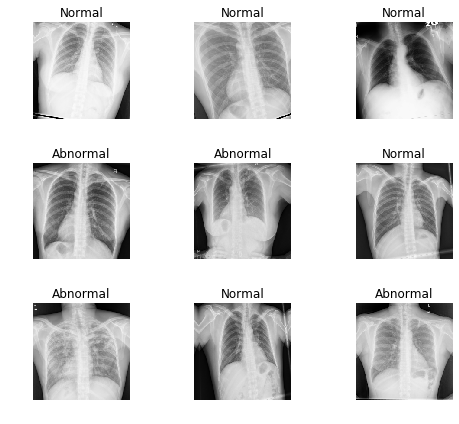

In [22]:
data.show_batch(rows=3, figsize=(7,6))

In [23]:
data.c,len(data.train_ds), len(data.valid_ds)

(2, 640, 160)

In [24]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 165997758.39it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


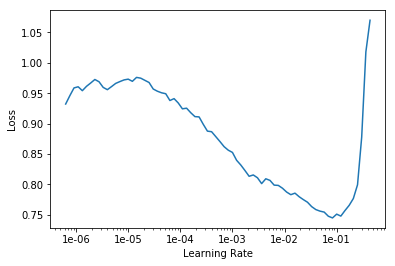

In [25]:
learn.lr_find()
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.766271,1.154231,0.500000,02:58
1,0.710728,1.313834,0.418750,02:55
2,0.637939,1.139233,0.387500,02:54
3,0.583650,0.908173,0.337500,02:56
4,0.547200,0.533443,0.243750,02:55


In [27]:
learn.save('stage-1-50', return_path=True)

PosixPath('chinaset/ChinaSet_AllFiles/CXR_png/models/stage-1-50.pth')

In [28]:
learn.unfreeze()
learn.fit_one_cycle(15, max_lr=slice(1e-5,1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,0.605030,0.512767,0.193750,02:55
1,0.573469,0.849241,0.187500,02:56
2,0.555494,0.782144,0.181250,02:55
3,0.582258,3.923528,0.162500,02:56
4,0.802817,7.181063,0.193750,02:54
5,0.793305,3.794062,0.437500,02:56
6,0.732893,1.047302,0.237500,02:54
7,0.654042,0.418910,0.125000,02:53
8,0.569760,0.582821,0.187500,02:54
9,0.502430,0.365436,0.143750,02:55


In [29]:
learn.save('stage-2-50', return_path=True)

PosixPath('chinaset/ChinaSet_AllFiles/CXR_png/models/stage-2-50.pth')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

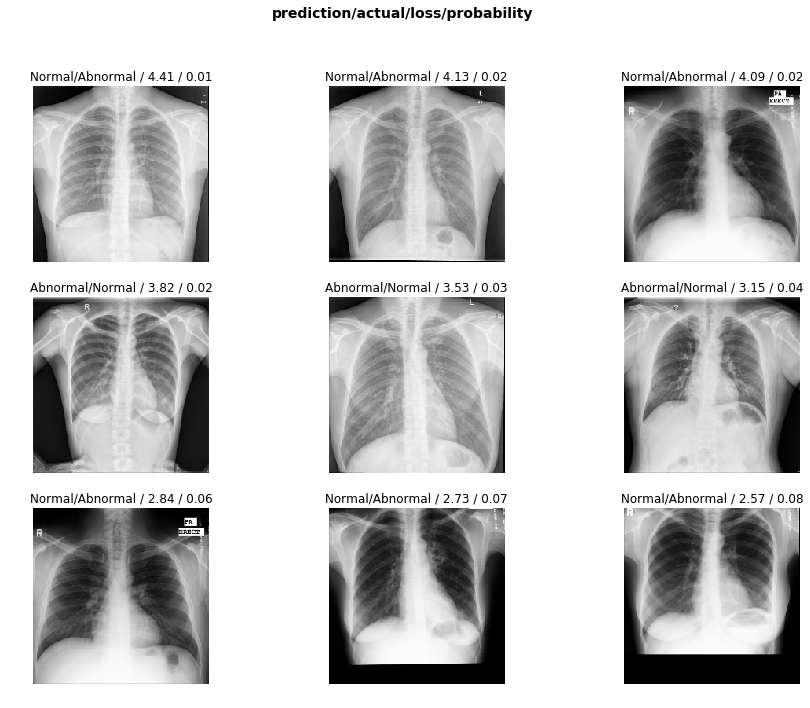

In [31]:
interp.plot_top_losses(9, figsize=(15,11))

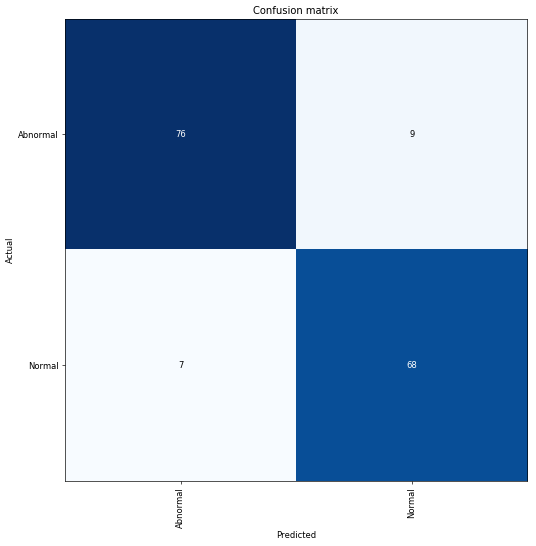

In [32]:
interp.plot_confusion_matrix(figsize=(9,9), dpi=60)